In [1]:
#Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
#importing necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#preprocessing, evaluation and report generation
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
#to display first 5 values from the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info() #dataset contains 30 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#to display first 5 values from the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# data preprocessing and cleaning

In [5]:
#Data preprocessing
#find the duplicate rows in the dataset
sum(df.duplicated())

1081

In [3]:
#Now , we try to drop the duplicate rows 
df.drop_duplicates(inplace=True) #inplace- to return nothing  ut execute the required changes

In [4]:
#We drop the time column , beacuse , it is useless
df.drop('Time', axis=1, inplace=True)

# Separating into feature columns and Target columns

In [5]:
X = df.iloc[:,df.columns != 'Class']
y = df.Class

# Train-Test SPLIT

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

In [7]:
#Scaling the dataset

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Data Vizualization

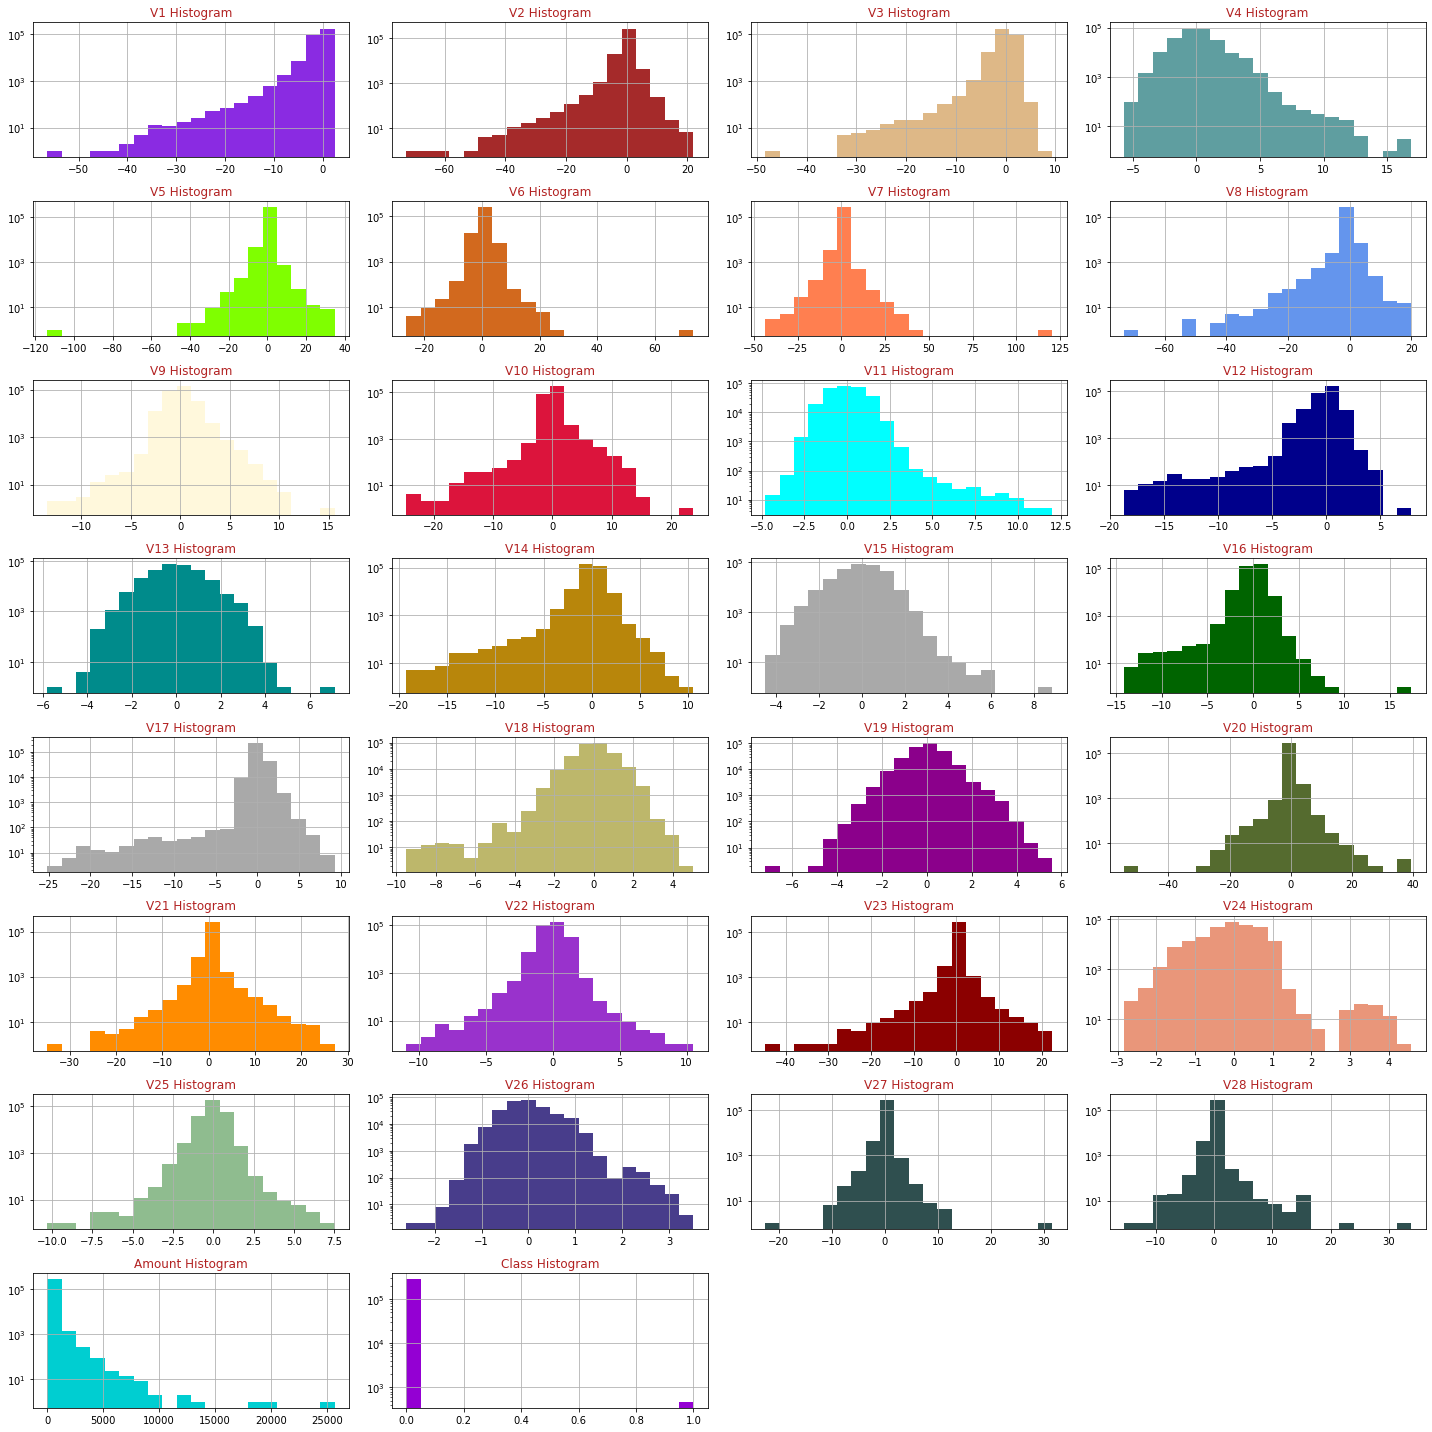

In [19]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

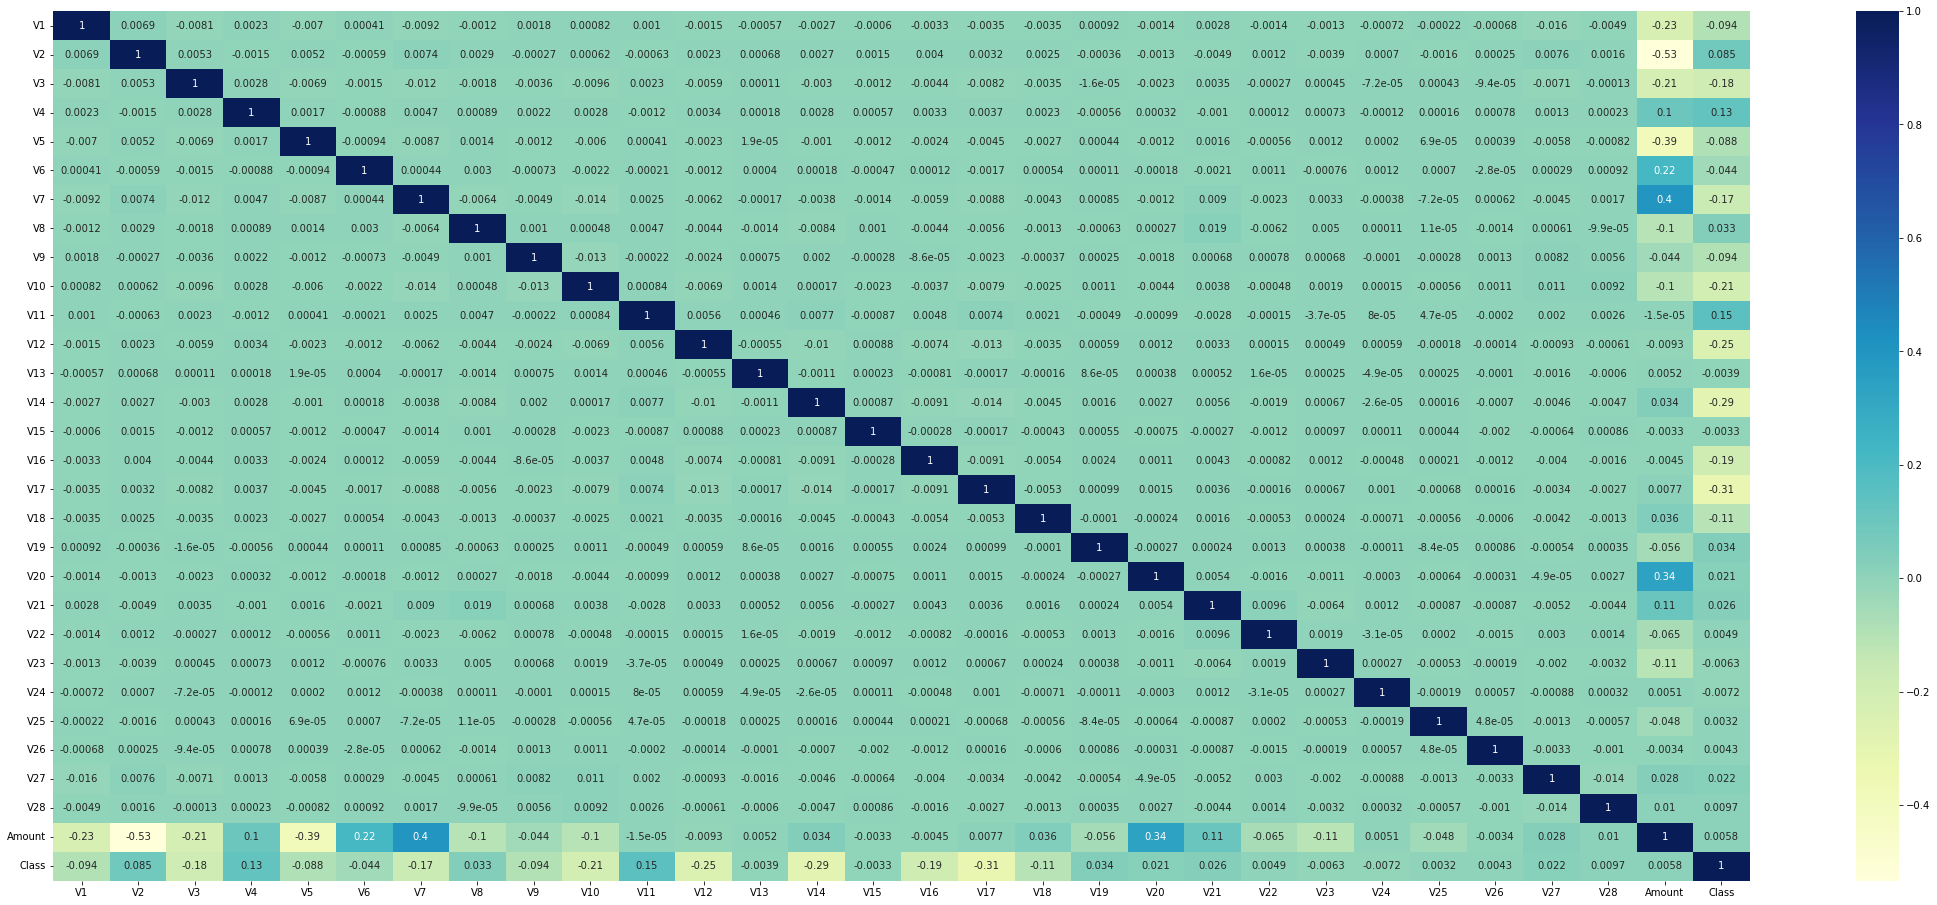

In [12]:
#Co-relation matrix
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(),cmap="YlGnBu", annot = True)
plt.savefig('heatmap.png')
plt.show()

# Model building

# --------------------Logistic Regression -----------------------------

In [20]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 99.92642523570359


In [21]:
y_pred = model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 99.92069925633524


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.65      0.73        95

    accuracy                           1.00     56746
   macro avg       0.92      0.83      0.87     56746
weighted avg       1.00      1.00      1.00     56746



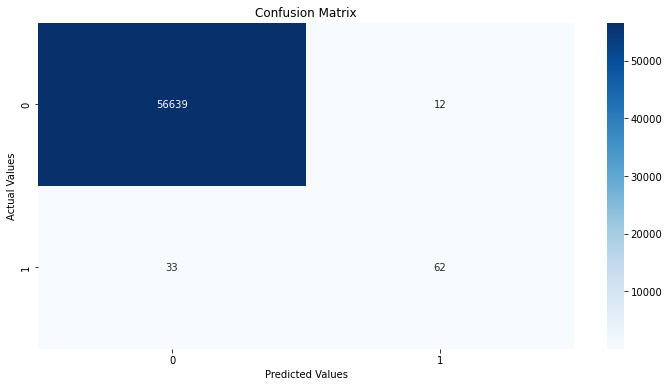

In [29]:
#Vizualising Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# --------------------- Naive Bayes -------------------

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:

classifier.fit(X_train_scaled, y_train)
train_acc = classifier.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 97.78218345228655


In [33]:
predictions= classifier.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.82      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.90      0.55     56746
weighted avg       1.00      0.98      0.99     56746

[[55419  1232]
 [   17    78]]
0.9779896380361611


# ----------------Decision Tree ---------------------

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.68      0.77      0.72        95

    accuracy                           1.00     56746
   macro avg       0.84      0.88      0.86     56746
weighted avg       1.00      1.00      1.00     56746

[[56617    34]
 [   22    73]]
0.9990131463010609


# -----------XGBoost----------

In [16]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.04,n_estimators=100,max_depth=4)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.04, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [18]:
Y_pred=classifier.predict(X_test)
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))
print(accuracy_score(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.78      0.84        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

[[56643     8]
 [   21    74]]
0.9994889507630493


In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

In [ ]:
predictions= classifier.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

In [ ]:
predictions_rf=random_forest.score(test_X,test_y)*100


In [7]:
from sklearn.neighbors import KNeighborsClassifier
n=7
KNN=KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train,y_train)
knn_yhat=KNN.predict(X_test)

KeyboardInterrupt: 